# Gradient image features: Histogram of Oriented Gradients (HoG) introduction
This exercise is about the extraction of gradient features from images. It offers an introduction and application of HoG features on a sample image.
The HOG features will be used in the exercises next week for classification.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#descriptor">Task 1: Calculate the HOG descriptor</a>
            </li>
            <li>
            <a href="#test">Task 2: Visualizing and understanding the HOG de…</a>
            </li>
            <li>
            <a href="#compare_images">Task 3: Comparing Hog Features</a>
            </li>
            <li>
            <a href="#interpretation">Task 4: Interpretation/ Understanding questions</a>
            </li>
        </ul>
    </div>
</article>

The cell below loads a sample image.


(480, 852, 3)


Text(0.5, 1.0, 'Input image')

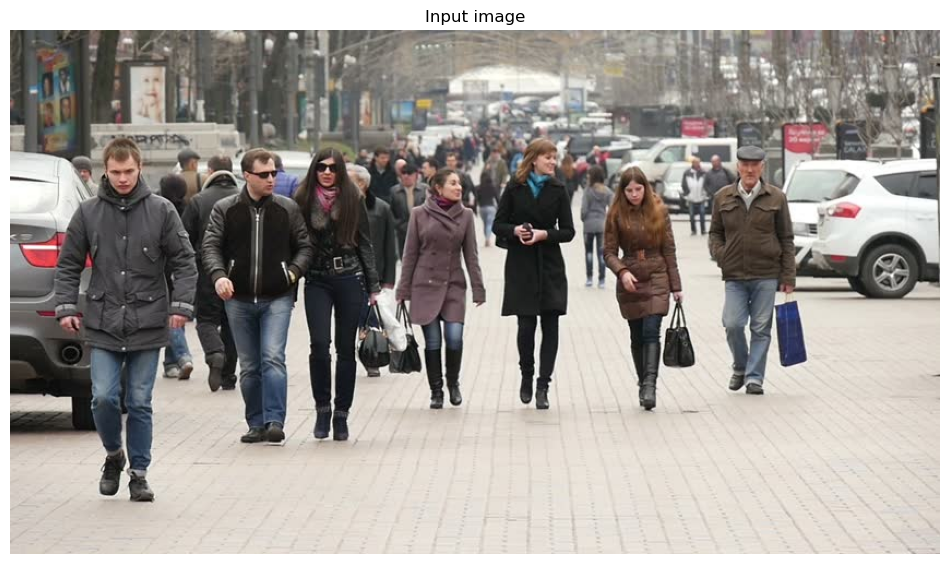

In [65]:
## load input image
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure


fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

fig, ax1 = plt.subplots(figsize=(12, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

In the following section: 
- you are introduced to the [HOG descriptor](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)

- shown how to calculate a HoG featues for an image including a visualization of the HoG descriptor.

## Overview of Histogram of Oriented Gradients (HOG) Algorithm
The Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision to detect objects. 
The function [skimage.feature.hog](https://scikit-image.org/docs/stable/api/skimage.feature.html<elem-2>.feature.hog)
 computes
the HOG features. It also returns the feature descriptor vector (`fd`
), in which its
size is equal to the number of: Bins $\times$ Block Columns
$\times$ Block Rows $\times$ Cells in the Block.
The process involves the following stages:
**1. Preprocessing / Smoothing:**


Initially, the image undergoes a global intensity normalization — a procedure that diminishes the effects of lighting. A common technique involves gamma (power-law) compression, which can be achieved by calculating the square root or logarithm of each color channel. This stage helps in reducing the impact of local shadowing and highlights variations since the image texture strength is generally related to the local surface illumination.
**2. Calculation of Image Gradients:**


This stage focuses on computing image gradients. The standard procedure is to either convert the image to grayscale or use the most prominent color channel. <article class="message is-info">
  <div class="message-header">Info</div>
  <div class="message-body">

  This step was implemented by us in the first part of the exercise.


  </div>
</article>
 
**3. Creation of Cells and Calculation of normalized Histograms:**


The objective here is to create an encoding of local gradients. This involves partitioning the image window into smaller spatial cells. Each cell creates a histogram of image gradient orientations and performs various steps to normalize intensities and histograms. 
**4. Compilation of Feature Vector:**


The HOG feature is constructed by concatenating the histograms for each cell into one final HOG feature descriptor (vector). 
<article class="message task"><a class="anchor" id="descriptor"></a>
    <div class="message-header">
        <span>Task 1: Calculate the HOG descriptor</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to calculate and plot the HOG descriptor. 



</div></article>



(270, 220, 3)


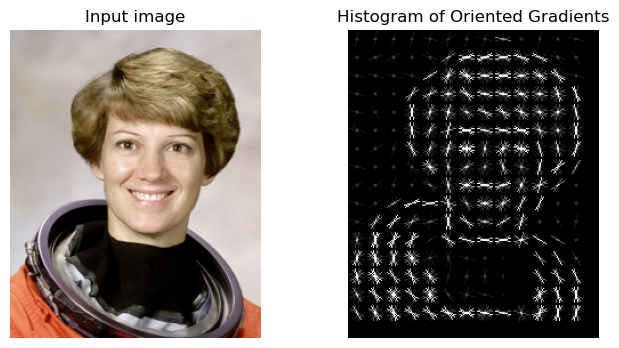

In [66]:
# load new image
image1 = data.astronaut()[:270,100:320]
print(image1.shape)

feature_vector=True,
bins = 8
pixels_per_cell = 16
cells_per_block = 4

(fd1, hog_feat1) = hog(
    image1,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
)
hog_feat1 = hog_feat1.astype("uint8")


# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_feat1, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

<article class="message task"><a class="anchor" id="test"></a>
    <div class="message-header">
        <span>Task 2: Visualizing and understanding the HOG descriptor</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Change the parameters of the HOG descriptor and visualize how the feature descriptor changes.
1. Change the parameters for the HOG descriptor:

- the number of bins
- the number of pixels per cell
- the number of cells per block

and visually observe how the dimensionality and the features change.
2. The following cell loads an image of a cat. Use the HOG descriptor on this image.



</div></article>



(270, 220, 3)


Text(0.5, 1.0, 'Histogram of Oriented Gradients')

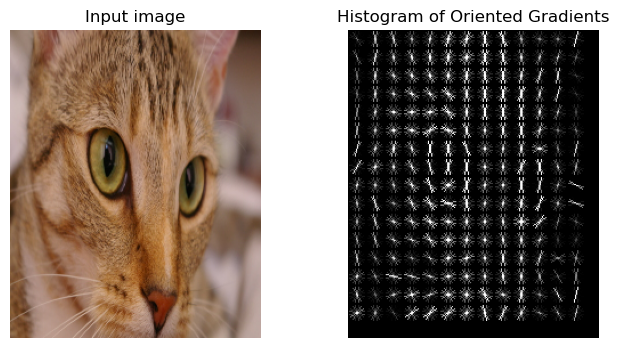

In [67]:
image2 = data.cat()[:270,:440:2]
print(image2.shape)

fd2,hog_image2 = hog(
    image2,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=True,
    channel_axis=-1
) # replace this with hog feature results. fd is the feature vector and hog_image is the visualization of the calculated gradients.

# after implementation of the HoG function, run the following plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image2, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled2 = exposure.rescale_intensity(hog_image2, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled2, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

<article class="message task"><a class="anchor" id="compare_images"></a>
    <div class="message-header">
        <span>Task 3: Comparing Hog Features</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


This task will compare two HoG features of different images. 
1. For different settings visually compare the hog features
2. Calculate the normalized (use `np.linalg.norm`
 to normalize vectors) scalar product between the two feature vectors `fd1`
 and `fd2`
.     - What is the scalar product between two feature vectors? (compare it to the value of 1 )
    - Repeat the calculation for multiple HoG filter settings, notice a difference? 



<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Set `feature_vector`
=True in `hog`



  </div>
</article>
3. Based on the cosine similarity (normalized inner product), explain how HoG features can be used to classify different images of cat/humans.



</div></article>



In [79]:
# calculate the similarity here..
norm = np.dot(np.linalg.norm(fd1),np.linalg.norm(fd2))
print(norm)
# TODO: I dont understand this

129.99999999999363


<article class="message task"><a class="anchor" id="interpretation"></a>
    <div class="message-header">
        <span>Task 4: Interpretation/ Understanding questions</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Select several images from the dataset (`peopleXY.jpg`
) and visually compare the HOG features of people and non-people images. 
1. How could HoG features be used to classify different objects in a larger image with multiple people? 

2. Explain how the HOG features use local information to create an understanding of the content of the full image? 


The code in the cell below visualizes the HoG features:


</div></article>



(480, 852, 3)
 HoG feature vector shape: (27, 50, 4, 4, 8)
 HoG feature vector shape after vectorization: (172800,)


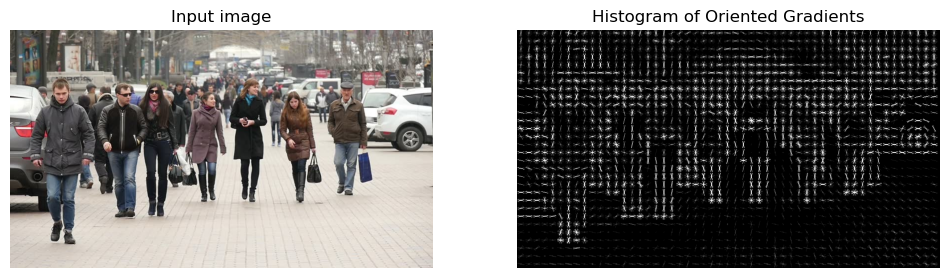

In [78]:
# load new image
fn =  "./data/people01.jpg"
image = plt.imread(fn)
print(image.shape)

feature_vector=True,
bins = 8
pixels_per_cell = 16
cells_per_block = 4

# Compute HOG.
(fd, hog_feat) = hog(
    image,
    orientations=bins,
    pixels_per_cell=(pixels_per_cell, pixels_per_cell),
    cells_per_block=(cells_per_block, cells_per_block),
    block_norm="L2",
    visualize=True,
    feature_vector=False,
    channel_axis=-1
)
hog_feat = hog_feat.astype("uint8")


print(f' HoG feature vector shape: {fd.shape}')
print(f' HoG feature vector shape after vectorization: {fd.reshape(-1).shape}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_feat, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [70]:
# write your reflections here